# Content and Objective

+ Showing results ob binary detection in $\mathbb{R}^n$
+ Method: Two points are sampled randomly, afterwards several trials are simulated for estimating error probability

In [1]:
# importing
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import matplotlib

# showing figures inline
%matplotlib inline

In [2]:
# plotting options 
font = {'size'   : 30}
plt.rc('font', **font)
#plt.rc('text', usetex=True)

matplotlib.rc('figure', figsize=(30, 12) )

# Parameters

In [3]:
# define dimension of space
N = 2

# define number of trials
N_trial = int( 1e4 )

# generate zwo points randomly and get vector between them
s_1 = np.random.randn( N ) 

s_2 = np.random.randn( N ) 

s = [ s_1, s_2 ]
Eb = .5 * np.linalg.norm( s_1 )**2 + .5 * np.linalg.norm( s_2 ) **2
d = np.linalg.norm( s_1 - s_2 )

# connecting vector
v = np.array( s_1 - s_2 )
v /= np.linalg.norm( v )

# print Tx vectors
print('Transmit vectors:\n')
print('s_1=', s_1)
print('s_2=', s_2)

Transmit vectors:

s_1= [ 0.45761711 -0.9076921 ]
s_2= [-0.03808654  0.75819028]



# Add Noise and Estimate

In [4]:
# define snr and linearize it
Eb_N0_dB = np.arange(0, 31, 2 )

Eb_N0 = 10**( Eb_N0_dB / 10 ) 
sigma2 = Eb / ( 2 * Eb_N0 )

# NOTE: sigma2 has to include the intended Eb/N0 as well as the actual Eb
# NOTE 2: since "all is real", sigma^2 = N0/2

# initialize ber
ber_euclidean = np.zeros_like( sigma2 )
ber_projection = np.zeros_like( sigma2 )


# loop along snr
for ind_sigma2, val_sigma2 in enumerate( sigma2 ):
    
    # initialize number of errors
    numb_errors_projection = 0
    numb_errors_euclidean = 0

    
    # loop along realizations
    for _n in range( N_trial ):
        
        bit = np.random.randint( 2 )
        x = s[ bit ]
        
        # get output signal by adding noise
        noise = np.sqrt( val_sigma2 ) * np.random.randn( N )
        y = x + noise

        
        # two decision criteria:
        # - first using "standard ML decision in R^n" --> "euclidean"
        # - second using projection as on slides --> "projection"
        
        # get decision variable
        y_tilde = np.inner( v, y - ( s_1 + s_2 ) / 2 )
        
        # estimate bit
        bit_est_projection = int( y_tilde < 0 )
        numb_errors_projection += int( bit != bit_est_projection ) 
        
        
        # estimate by using euclidean distance
        bit_est_euclidean = int( np.linalg.norm( y - s_1 ) > np.linalg.norm( y - s_2 ) )
        numb_errors_euclidean += int( bit != bit_est_euclidean )

        
    # evaluate error rate
    ber_projection[ ind_sigma2 ] = numb_errors_projection / N_trial
    ber_euclidean[ ind_sigma2 ] = numb_errors_euclidean / N_trial

# Show Results

Transmit vectors:

s_1= [ 0.45761711 -0.9076921 ]
s_2= [-0.03808654  0.75819028]


Text(0.5, 1.0, 's_1 = [ 0.45761711 -0.9076921 ], s_2 = [-0.03808654  0.75819028]')

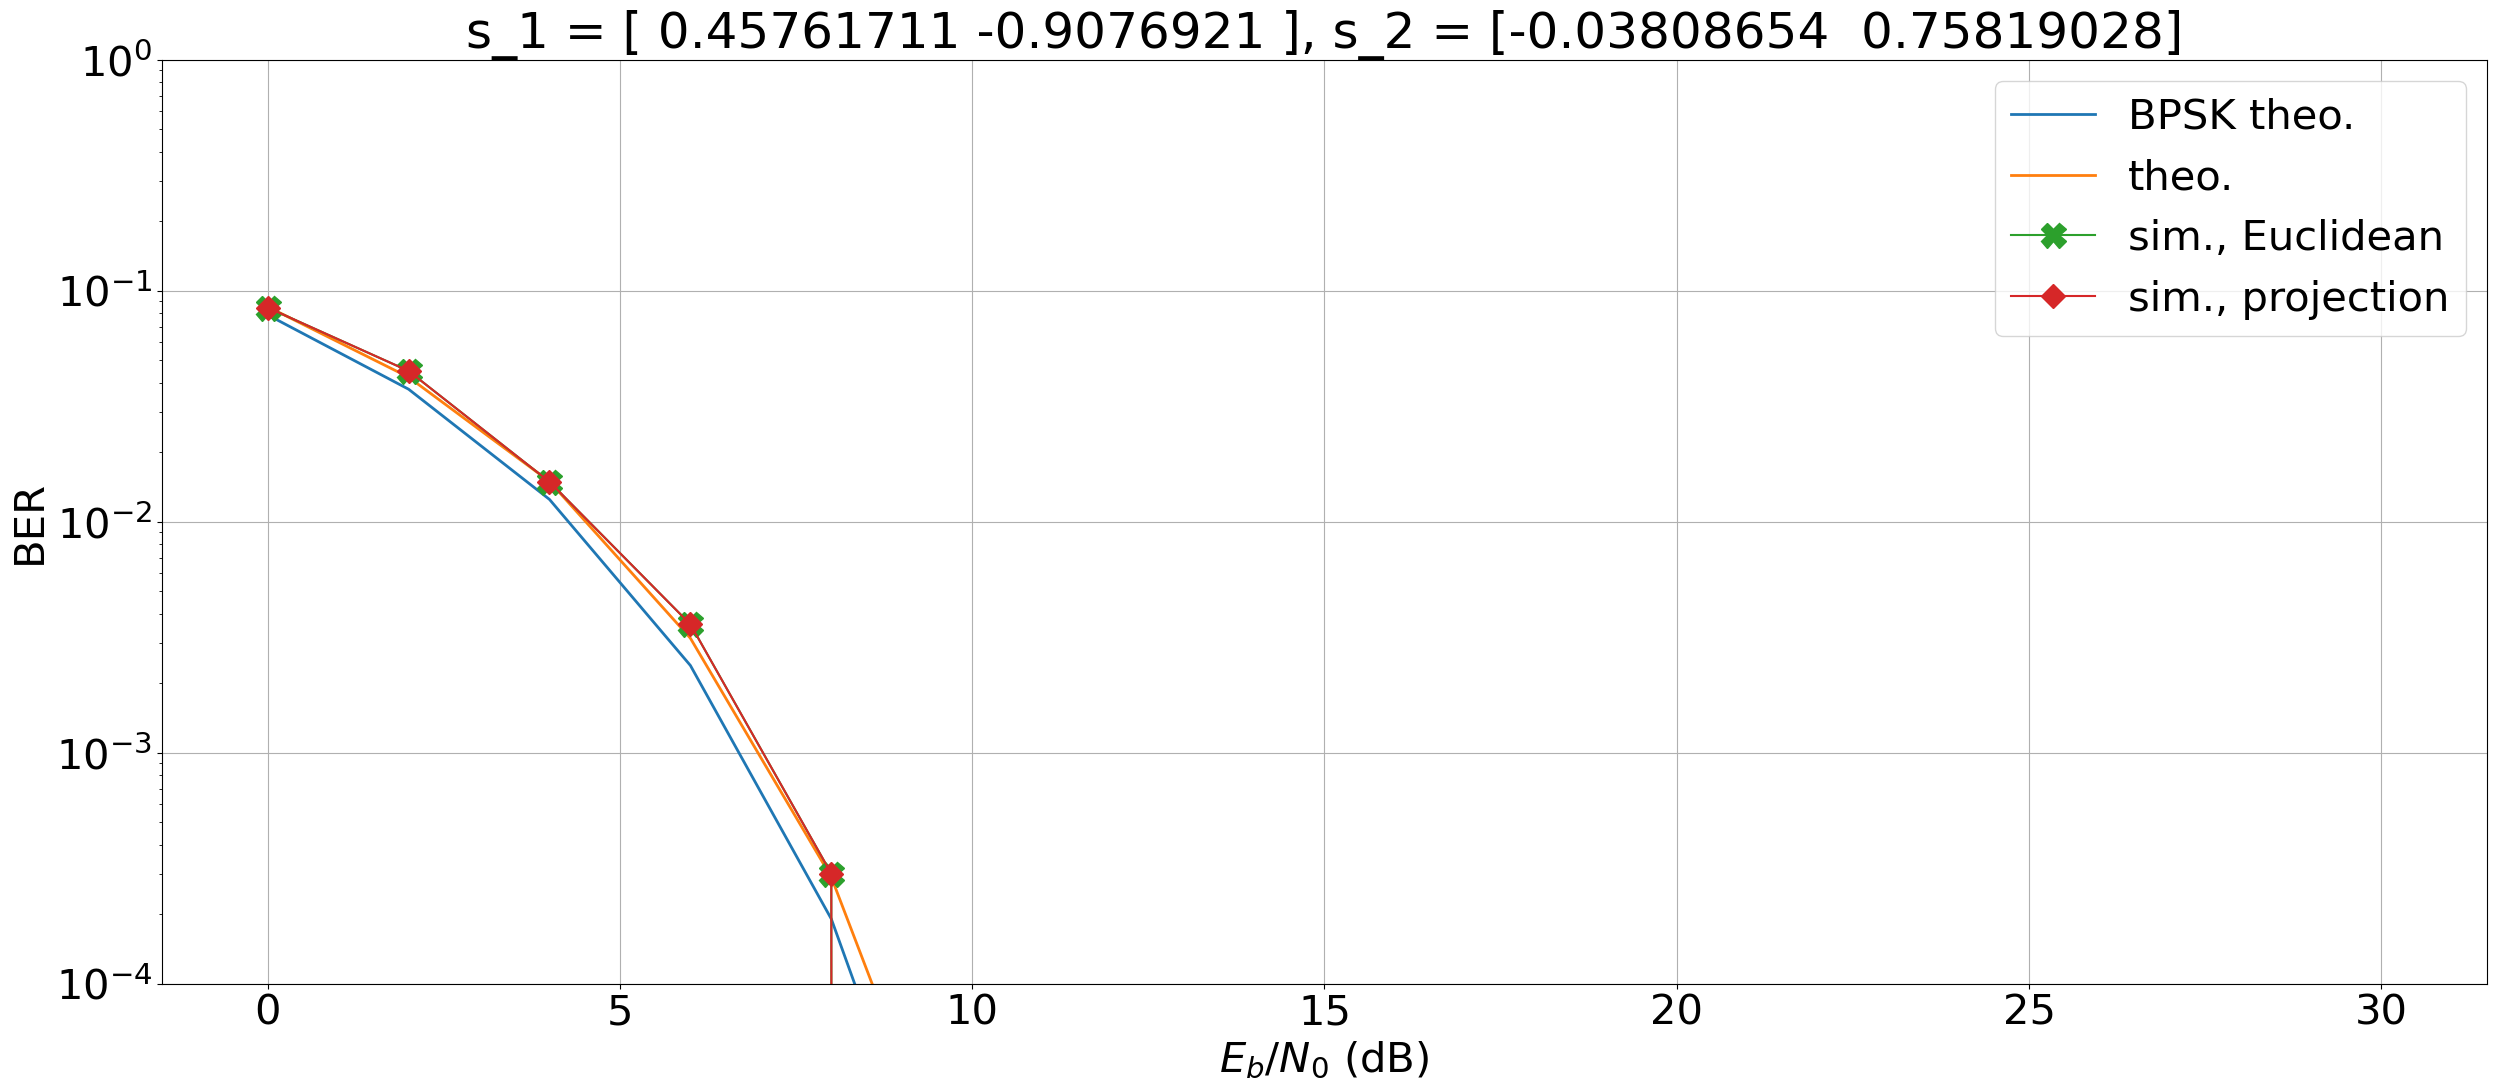

In [5]:
ber_bpsk_theo = 1 - stats.norm.cdf( np.sqrt(  2 * Eb_N0 ) ) 
ber_theo = 1 - stats.norm.cdf( np.sqrt( np.linalg.norm( s_1 - s_2 )**2 / ( 4. * sigma2 ) ) ) 

# print Tx vectors
print('Transmit vectors:\n')
print('s_1=', s_1)
print('s_2=', s_2)

plt.figure()

plt.plot( Eb_N0_dB, ber_bpsk_theo, linewidth=2.0, label = "BPSK theo.")
plt.plot( Eb_N0_dB, ber_theo, linewidth=2.0, label = "theo.")
plt.semilogy( Eb_N0_dB, ber_euclidean, '-X', ms=18, label='sim., Euclidean' ) 
plt.semilogy( Eb_N0_dB, ber_projection, '-D', ms=12, label='sim., projection' ) 

plt.legend( loc='upper right' )
plt.grid(True)
plt.xlabel('$E_b/N_0$ (dB)')
plt.ylabel('BER');
plt.ylim( (1e-4, 1) ) 
plt.title('s_1 = ' + str(s_1) + ', s_2 = ' + str( s_2 ) )

### Discussion:

+ **Note:** Theoretical results of slides and simulations using projections and Euclidean distance, respectively, seem to match

+ **Question:** Can you reason why theoretical values of BPSK don't match the other results?